## Projeto Final - Big Data Science

Este notebook tem por objetivo a análise dos microdados do Enem 2021, tendo como foco a comparação do desempenho entre alunos oriundos de escola pública e privada.

Autora: Karen Dantas C.


In [1]:

import pandas as pd
import seaborn as sns


<h3> Leitura dos dados </h3>

In [2]:

df = pd.read_csv("MICRODADOS_ENEM_2021.csv", sep=';', usecols=['TP_ST_CONCLUSAO','TP_ESCOLA','SG_UF_PROVA',
                                                               'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                                                               'NU_NOTA_MT','NU_NOTA_REDACAO','TP_FAIXA_ETARIA','TP_SEXO',
                                                               'TP_COR_RACA','TP_ESTADO_CIVIL','TP_NACIONALIDADE'])
df.head()


,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,5,F,1,1,1,1,1,MG,NaN,574.6,472.6,NaN,760.0
1,12,M,1,1,1,1,1,AL,505.9,551.8,498.3,461.5,560.0
2,13,F,3,1,1,1,1,SP,NaN,NaN,NaN,NaN,NaN
3,3,M,1,3,1,2,2,CE,580.7,678.9,638.9,659.5,780.0
4,2,F,1,3,1,2,2,CE,497.7,532.4,457.6,582.6,780.0


In [3]:

df.count()


TP_FAIXA_ETARIA     3389832
TP_SEXO             3389832
TP_ESTADO_CIVIL     3389832
TP_COR_RACA         3389832
TP_NACIONALIDADE    3389832
TP_ST_CONCLUSAO     3389832
TP_ESCOLA           3389832
SG_UF_PROVA         3389832
NU_NOTA_CN          2245844
NU_NOTA_CH          2378379
NU_NOTA_LC          2378379
NU_NOTA_MT          2245844
NU_NOTA_REDACAO     2378379
dtype: int64

<h3> Limpeza dos dados </h3>

In [4]:

df.isnull().sum()


TP_FAIXA_ETARIA           0
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ESCOLA                 0
SG_UF_PROVA               0
NU_NOTA_CN          1143988
NU_NOTA_CH          1011453
NU_NOTA_LC          1011453
NU_NOTA_MT          1143988
NU_NOTA_REDACAO     1011453
dtype: int64

In [5]:
#Deletar registros com valores nulos

df = df.dropna()
df.isnull().sum()
    

TP_FAIXA_ETARIA     0
TP_SEXO             0
TP_ESTADO_CIVIL     0
TP_COR_RACA         0
TP_NACIONALIDADE    0
TP_ST_CONCLUSAO     0
TP_ESCOLA           0
SG_UF_PROVA         0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
NU_NOTA_REDACAO     0
dtype: int64

In [6]:

df.count()


TP_FAIXA_ETARIA     2238107
TP_SEXO             2238107
TP_ESTADO_CIVIL     2238107
TP_COR_RACA         2238107
TP_NACIONALIDADE    2238107
TP_ST_CONCLUSAO     2238107
TP_ESCOLA           2238107
SG_UF_PROVA         2238107
NU_NOTA_CN          2238107
NU_NOTA_CH          2238107
NU_NOTA_LC          2238107
NU_NOTA_MT          2238107
NU_NOTA_REDACAO     2238107
dtype: int64

In [7]:

df.head()


,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,12,M,1,1,1,1,1,AL,505.9,551.8,498.3,461.5,560.0
3,3,M,1,3,1,2,2,CE,580.7,678.9,638.9,659.5,780.0
4,2,F,1,3,1,2,2,CE,497.7,532.4,457.6,582.6,780.0
8,8,F,1,3,1,2,2,MG,487.4,476.5,450.7,493.4,520.0
9,4,F,1,3,1,2,2,BA,507.6,539.2,494.6,413.3,380.0


In [8]:
#Selecionar as pessoas que já concluíram o ensino médio, ou que estavam cursando o ensino médio e concluiriam em 2021

filtro_ensino_medio = ((df['TP_ST_CONCLUSAO'] == 1) | (df['TP_ST_CONCLUSAO'] == 2))

df = df[filtro_ensino_medio]


In [9]:

df.count()


TP_FAIXA_ETARIA     1864224
TP_SEXO             1864224
TP_ESTADO_CIVIL     1864224
TP_COR_RACA         1864224
TP_NACIONALIDADE    1864224
TP_ST_CONCLUSAO     1864224
TP_ESCOLA           1864224
SG_UF_PROVA         1864224
NU_NOTA_CN          1864224
NU_NOTA_CH          1864224
NU_NOTA_LC          1864224
NU_NOTA_MT          1864224
NU_NOTA_REDACAO     1864224
dtype: int64

In [10]:
#Excluir as pessoas que não informaram se são de escola particular ou pública

filtro_escola = (df['TP_ESCOLA'] != 1)
dados = df[filtro_escola].copy()


In [11]:

dados.count()


TP_FAIXA_ETARIA     847397
TP_SEXO             847397
TP_ESTADO_CIVIL     847397
TP_COR_RACA         847397
TP_NACIONALIDADE    847397
TP_ST_CONCLUSAO     847397
TP_ESCOLA           847397
SG_UF_PROVA         847397
NU_NOTA_CN          847397
NU_NOTA_CH          847397
NU_NOTA_LC          847397
NU_NOTA_MT          847397
NU_NOTA_REDACAO     847397
dtype: int64

<h3> Análise Descritiva </h3>

Em relação aos dados, estão sendo consideradas as pessoas que:
* Já concluíram o ensino médio, ou que estavam cursando o ensino médio e concluiriam em 2021;
* Informaram se cursaram o ensino médio em escola pública ou privada;
* Fizeram todas as provas do Enem 2021 (Linguagens, Códigos e suas tecnologias; Redação; Ciências Humanas e suas tecnologias; Ciências da Natureza e suas tecnologias; Matemática e suas tecnologias).

In [12]:

dados["TP_ESCOLA"] = dados["TP_ESCOLA"].map({ 2 : 'Pública', 3 : 'Privada'})


In [13]:

dados["TP_FAIXA_ETARIA"] = dados["TP_FAIXA_ETARIA"].map({ 1 : 'Menor de 17 anos', 2 : '17 anos', 3 : '18 anos', 
                                                         4 : '19 anos', 5 : '20 anos', 6 : '21 anos', 7 : '22 anos',
                                                        8 : '23 anos', 9 : '24 anos', 10 : '25 anos', 
                                                         11 : 'Entre 26 e 30 anos', 12 : 'Entre 31 e 35 anos',
                                                         13 : 'Entre 36 e 40 anos', 14 : 'Entre 41 e 45 anos',
                                                         15 : 'Entre 46 e 50 anos', 16: 'Entre 51 e 55 anos',
                                                         17 : 'Entre 56 e 60 anos', 18 : 'Entre 61 e 65 anos',
                                                         19 : 'Entre 66 e 70 anos', 20 : 'Maior de 70 anos'})


In [14]:

dados["TP_SEXO"] = dados["TP_SEXO"].map({ 'F' : 'Feminino', 'M' : 'Masculino'}) 


In [15]:

dados["TP_COR_RACA"] = dados["TP_COR_RACA"].map({ 0 : 'Não declarado', 1 : 'Branca', 2 : 'Preta', 3 : 'Parda', 
                                                 4 : 'Amarela', 5 : 'Indígena', 6 : 'Não dispõe da informação'}) 


In [16]:

dados["TP_NACIONALIDADE"] = dados["TP_NACIONALIDADE"].map({ 0 : 'Não informado', 1 : 'Brasileiro(a)', 
                                                           2 : 'Brasileiro(a) Naturalizado(a)', 3 : 'Estrangeiro(a)', 
                                                           4 : 'Brasileiro(a) Nato(a), nascido(a) no exterior'}) 


In [17]:

dados.head()


,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
3,18 anos,Masculino,1,Parda,Brasileiro(a),2,Pública,CE,580.7,678.9,638.9,659.5,780.0
4,17 anos,Feminino,1,Parda,Brasileiro(a),2,Pública,CE,497.7,532.4,457.6,582.6,780.0
8,23 anos,Feminino,1,Parda,Brasileiro(a),2,Pública,MG,487.4,476.5,450.7,493.4,520.0
9,19 anos,Feminino,1,Parda,Brasileiro(a),2,Pública,BA,507.6,539.2,494.6,413.3,380.0
11,17 anos,Feminino,1,Branca,Brasileiro(a),2,Pública,RN,378.5,502.7,487.7,514.9,680.0


<h4>Análise das características gerais da amostra </h4>

<AxesSubplot: title={'center': 'Tipo de Escola'}, ylabel='TP_ESCOLA'>

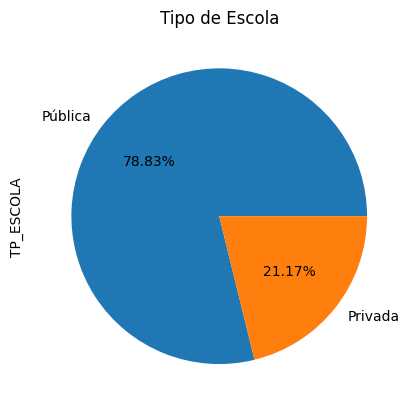

In [18]:

dados['TP_ESCOLA'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%', title='Tipo de Escola')


<AxesSubplot: title={'center': 'Sexo'}, ylabel='TP_SEXO'>

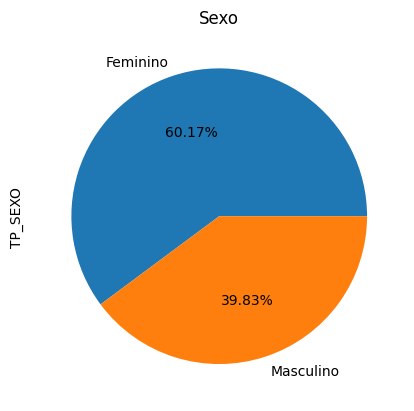

In [19]:

dados['TP_SEXO'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%', title='Sexo')


In [20]:

dados['TP_COR_RACA'].value_counts(normalize=True)*100


Branca           45.297305
Parda            39.981732
Preta            10.176576
Não declarado     2.095476
Amarela           1.973455
Indígena          0.475456
Name: TP_COR_RACA, dtype: float64

<AxesSubplot: title={'center': 'Raça'}, ylabel='(em %)'>

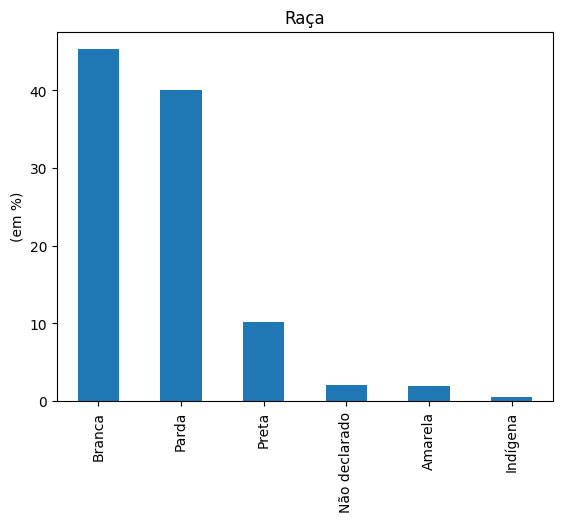

In [21]:

(dados['TP_COR_RACA'].value_counts(normalize=True)*100).plot(kind='bar', title='Raça', ylabel='(em %)')


In [22]:

dados['SG_UF_PROVA'].value_counts(normalize=True)*100


SP    17.346887
MG     8.707371
CE     8.294577
BA     7.537907
RJ     6.943381
PE     5.391216
PR     5.262704
RS     4.537661
GO     4.380119
PA     3.912334
MA     3.131944
SC     3.042730
AM     2.532225
PB     2.446905
ES     2.117661
DF     2.067390
PI     2.013696
RN     1.937817
MT     1.545793
AL     1.407723
MS     1.345414
SE     1.343290
TO     0.870902
RO     0.829245
AC     0.433917
AP     0.426601
RR     0.192590
Name: SG_UF_PROVA, dtype: float64

In [23]:

dados['TP_FAIXA_ETARIA'].value_counts(normalize=True)*100


17 anos               44.826333
18 anos               42.479027
19 anos                7.492002
20 anos                2.099960
Menor de 17 anos       1.186457
21 anos                0.641376
22 anos                0.264811
Entre 26 e 30 anos     0.236725
Entre 31 e 35 anos     0.147157
23 anos                0.141610
Entre 36 e 40 anos     0.110220
24 anos                0.104319
Entre 41 e 45 anos     0.075643
25 anos                0.074345
Entre 46 e 50 anos     0.056054
Entre 51 e 55 anos     0.035285
Entre 56 e 60 anos     0.018645
Entre 61 e 65 anos     0.006726
Entre 66 e 70 anos     0.002478
Maior de 70 anos       0.000826
Name: TP_FAIXA_ETARIA, dtype: float64

In [24]:

dados['TP_NACIONALIDADE'].value_counts(normalize=True)*100


Brasileiro(a)                                    97.554865
Brasileiro(a) Naturalizado(a)                     1.965903
Brasileiro(a) Nato(a), nascido(a) no exterior     0.241917
Estrangeiro(a)                                    0.127449
Não informado                                     0.109866
Name: TP_NACIONALIDADE, dtype: float64

<h4>Análise das Características da amostra </h4>

In [25]:

notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']


In [26]:

dados[notas].describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,847397.0,484.17,77.90,0.0,424.9,474.3,536.7,848.7
NU_NOTA_CH,847397.0,513.07,90.80,0.0,441.9,513.1,579.4,846.9
NU_NOTA_LC,847397.0,498.15,76.14,0.0,444.8,500.7,552.2,820.5
NU_NOTA_MT,847397.0,529.69,107.63,0.0,441.9,509.1,605.7,953.1
NU_NOTA_REDACAO,847397.0,615.04,189.22,0.0,520.0,600.0,740.0,1000.0


In [27]:

filtro_publica = (dados['TP_ESCOLA'] == 'Pública')
dados_publica = dados[filtro_publica].copy()


In [28]:

dados_publica[notas].describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,668036.0,469.46,69.43,0.0,417.3,461.4,514.6,848.7
NU_NOTA_CH,668036.0,498.44,85.23,0.0,432.2,496.0,561.3,846.9
NU_NOTA_LC,668036.0,485.26,72.38,0.0,434.1,487.8,536.8,820.5
NU_NOTA_MT,668036.0,508.64,95.32,0.0,433.1,488.9,571.5,953.1
NU_NOTA_REDACAO,668036.0,583.28,185.20,0.0,500.0,580.0,680.0,1000.0


In [29]:

filtro_privada = (dados['TP_ESCOLA'] == 'Privada')
dados_privada = dados[filtro_privada].copy()


In [30]:

dados_privada[notas].describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,179361.0,538.99,83.08,0.0,477.2,542.5,598.9,844.5
NU_NOTA_CH,179361.0,567.55,90.16,0.0,510.5,577.3,630.3,846.9
NU_NOTA_LC,179361.0,546.16,70.41,0.0,502.2,551.8,595.4,799.3
NU_NOTA_MT,179361.0,608.09,114.45,0.0,519.5,615.6,691.5,953.1
NU_NOTA_REDACAO,179361.0,733.34,153.80,0.0,620.0,740.0,860.0,1000.0


[Text(0.5, 0, 'Tipo de escola'),
 Text(0, 0.5, 'Nota'),
 Text(0.5, 1.0, 'Ciências da Natureza e suas tecnologias')]

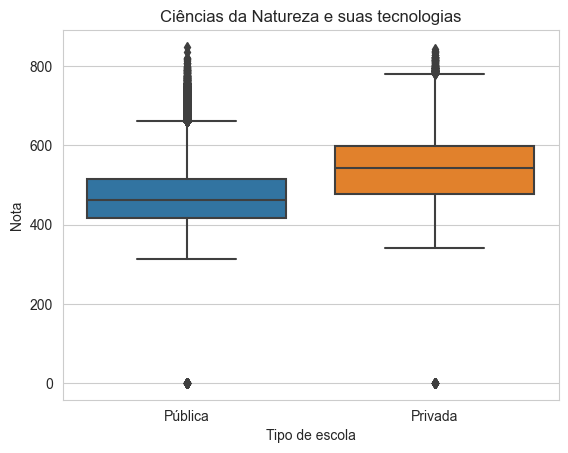

In [31]:

sns.set_style("whitegrid")
grafico = sns.boxplot(y="NU_NOTA_CN",x="TP_ESCOLA",data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota',title='Ciências da Natureza e suas tecnologias')


[Text(0.5, 0, 'Tipo de escola'),
 Text(0, 0.5, 'Nota'),
 Text(0.5, 1.0, 'Ciências Humanas e suas tecnologias')]

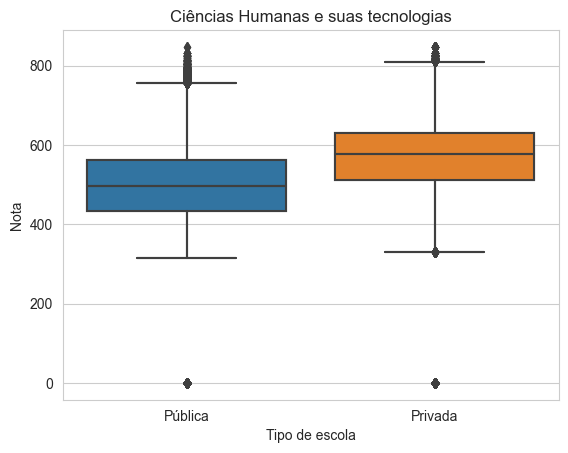

In [32]:

sns.boxplot(y="NU_NOTA_CH",x="TP_ESCOLA",data=dados)

grafico = sns.boxplot(y="NU_NOTA_CH",x="TP_ESCOLA",data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota',title='Ciências Humanas e suas tecnologias')


[Text(0.5, 24.0, 'Tipo de escola'),
 Text(24.000000000000007, 0.5, 'Nota'),
 Text(0.5, 1.0, 'Linguagens, Códigos e suas tecnologias')]

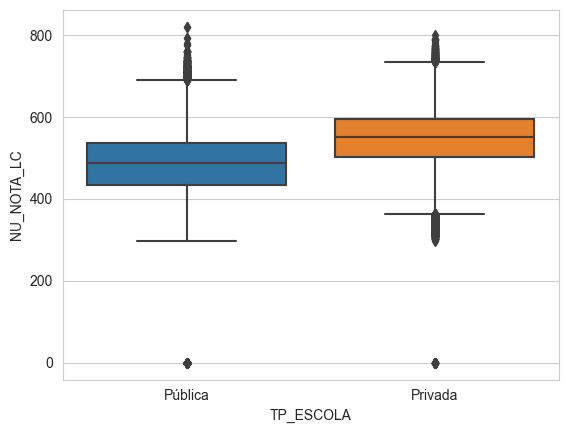

In [33]:

sns.boxplot(y="NU_NOTA_LC",x="TP_ESCOLA",data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota',title='Linguagens, Códigos e suas tecnologias')


[Text(0.5, 24.0, 'Tipo de escola'),
 Text(24.000000000000007, 0.5, 'Nota'),
 Text(0.5, 1.0, 'Matemática e suas tecnologias')]

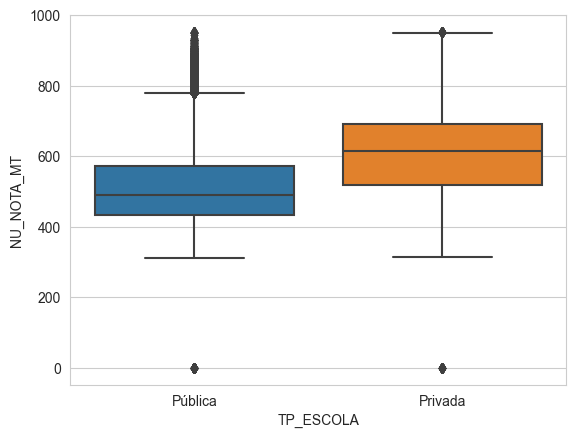

In [34]:

sns.boxplot(y="NU_NOTA_MT",x="TP_ESCOLA",data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota',title='Matemática e suas tecnologias')


[Text(0.5, 24.0, 'Tipo de escola'),
 Text(24.000000000000007, 0.5, 'Nota'),
 Text(0.5, 1.0, 'Redação')]

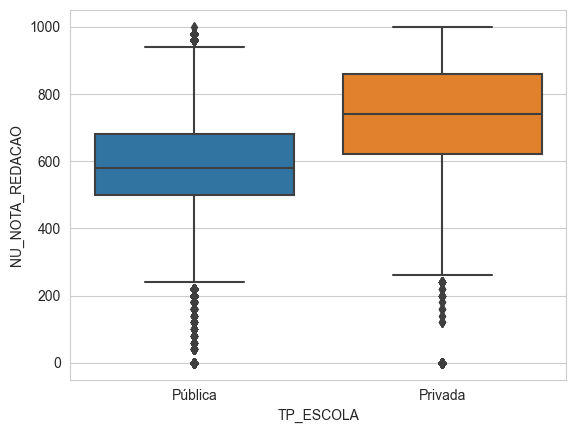

In [35]:

sns.boxplot(y="NU_NOTA_REDACAO",x="TP_ESCOLA",data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota',title='Redação')
